In [9]:
# import libraries

# pandas and numpy for data wrangling
import pandas as pd
import numpy as np

# seaborn / matplotlib for visualization 
import seaborn as sns
sns.set()

import matplotlib.pyplot as plt
%matplotlib inline

# Helper function to split our data
from sklearn.model_selection import train_test_split

# Helper fuctions to evaluate our model.
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report, roc_auc_score, f1_score

# Import our Decision Tree
from sklearn.tree import DecisionTreeClassifier 

# Import our Random Forest 
from sklearn.ensemble import RandomForestClassifier

# Import the trees from sklearn
from sklearn import tree

# Helper functions to visualize our trees
from sklearn.tree import plot_tree, export_text

In [10]:
df = pd.read_csv('clean_sleep_data_v2.csv')
df.head()

,person_id,gender,age,occupation,sleep_duration,quality_of_sleep,physical_activity_level,stress_level,bmi_category,blood_pressure,hear_rate,daily_steps,sleep_disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [11]:
print(df.columns)

Index(['person_id', 'gender', 'age', 'occupation', 'sleep_duration',
       'quality_of_sleep', 'physical_activity_level', 'stress_level',
       'bmi_category', 'blood_pressure', 'hear_rate', 'daily_steps',
       'sleep_disorder'],
      dtype='object')


In [12]:
df.isnull().sum()

person_id                    0
gender                       0
age                          0
occupation                   0
sleep_duration               0
quality_of_sleep             0
physical_activity_level      0
stress_level                 0
bmi_category                 0
blood_pressure               0
hear_rate                    0
daily_steps                  0
sleep_disorder             219
dtype: int64

In [15]:
df.fillna('None')

,person_id,gender,age,occupation,sleep_duration,quality_of_sleep,physical_activity_level,stress_level,bmi_category,blood_pressure,hear_rate,daily_steps,sleep_disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,370,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
370,371,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
371,372,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
372,373,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea


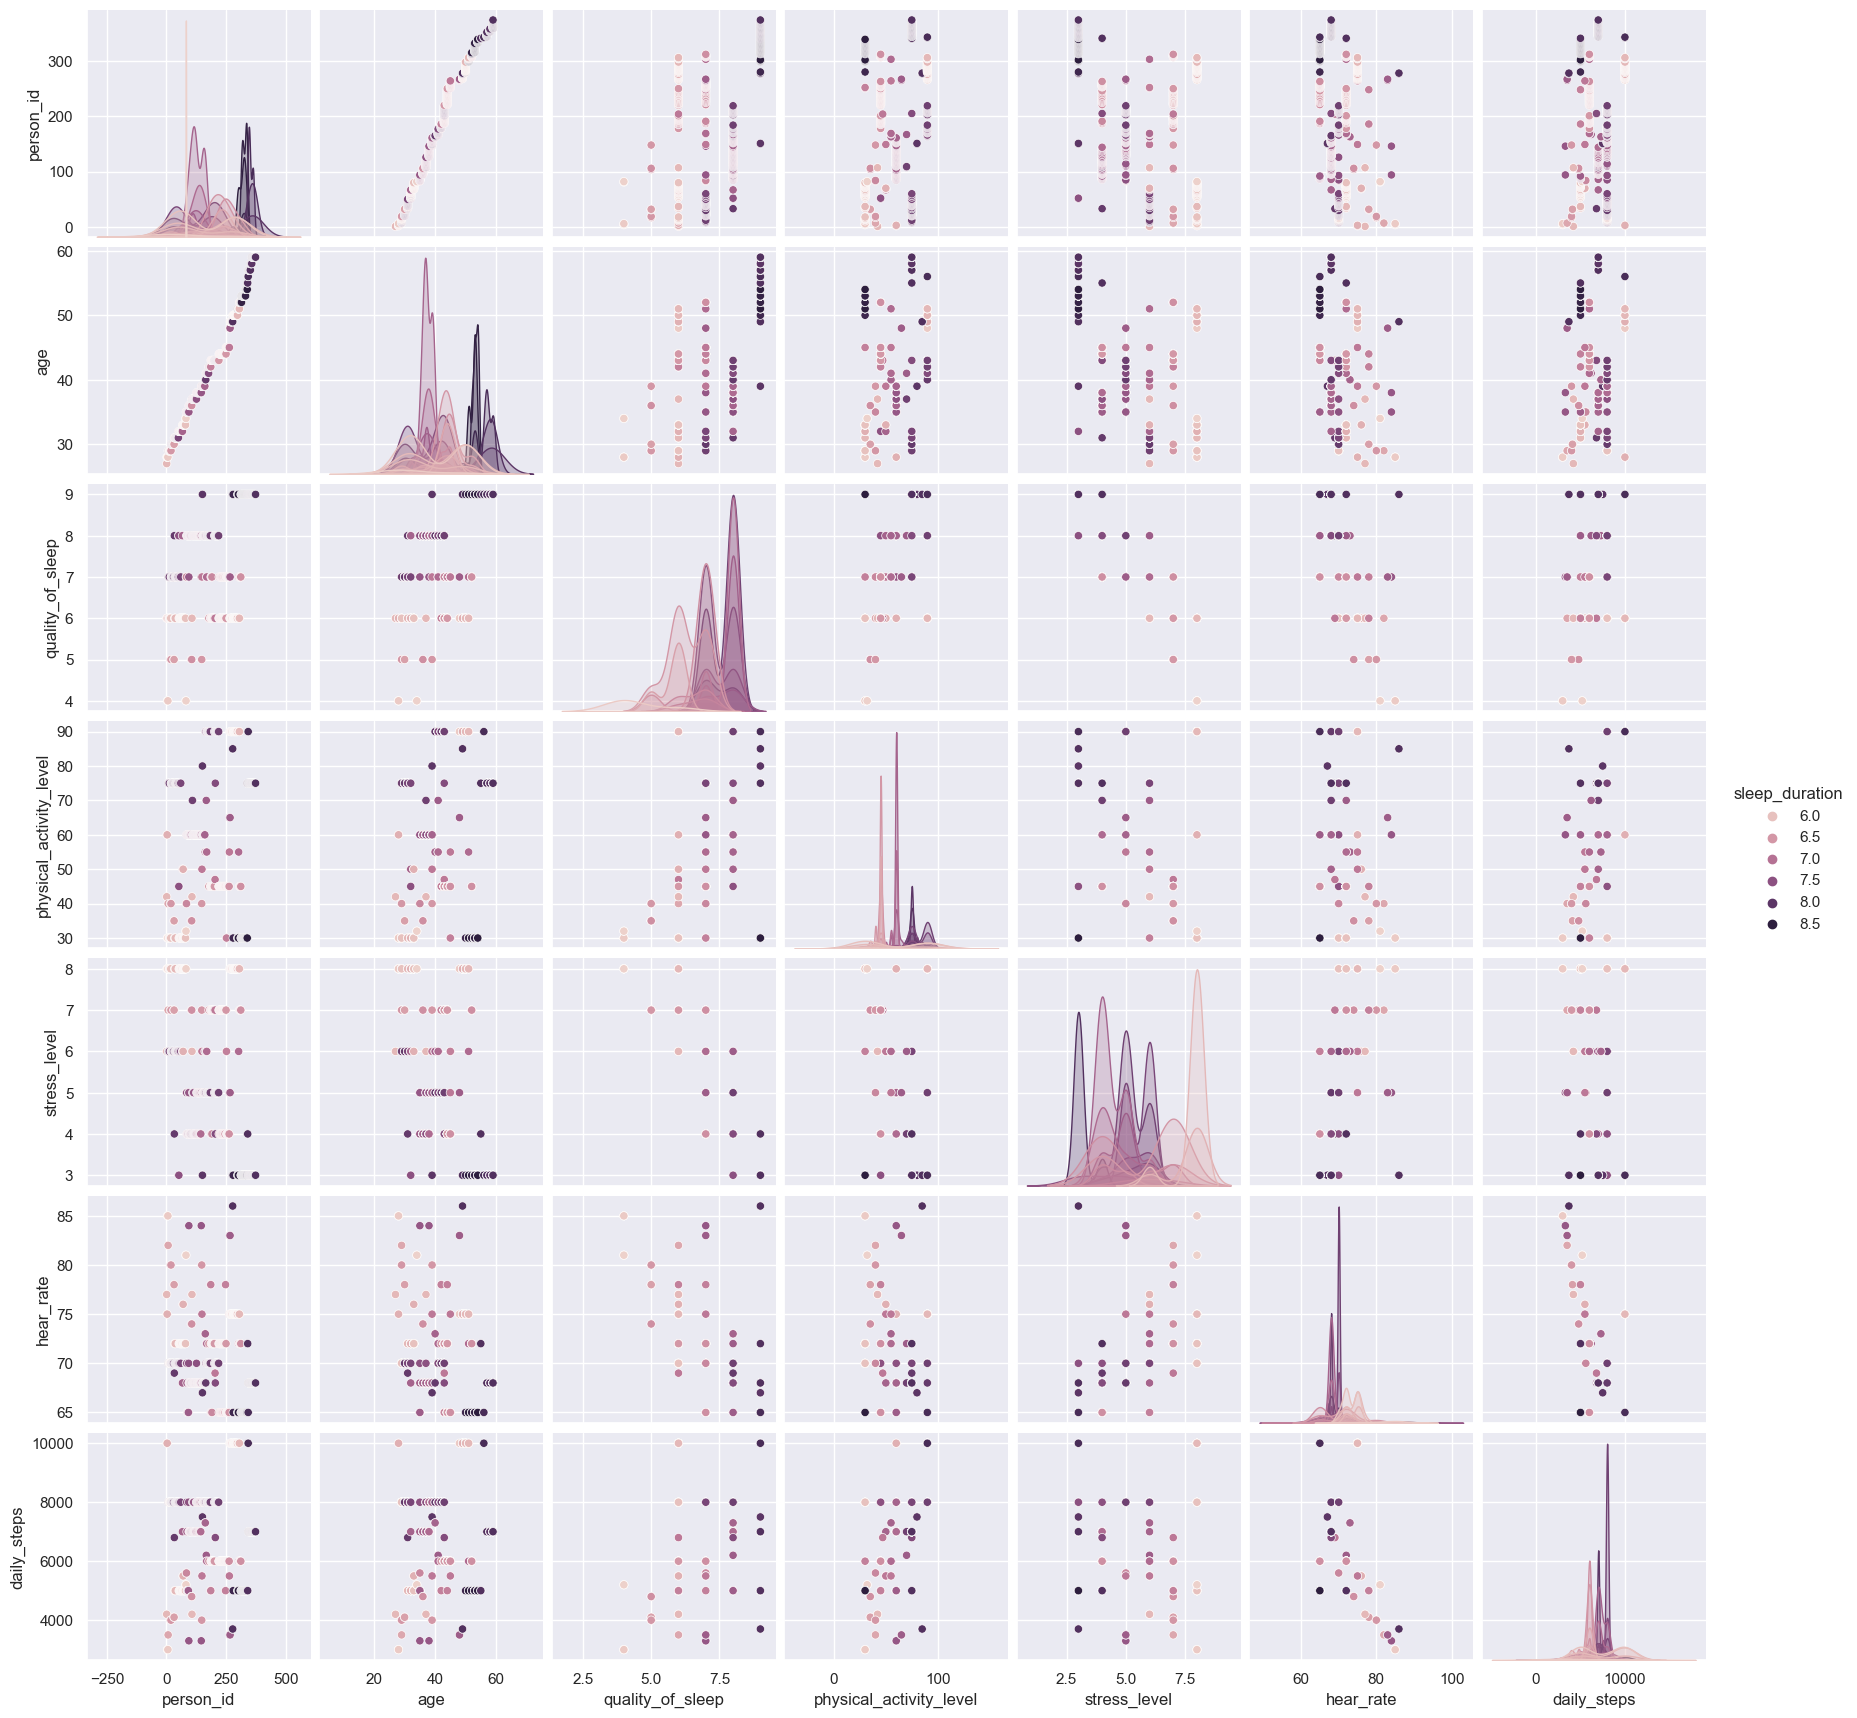

In [6]:
sns.pairplot(df, hue='sleep_duration')

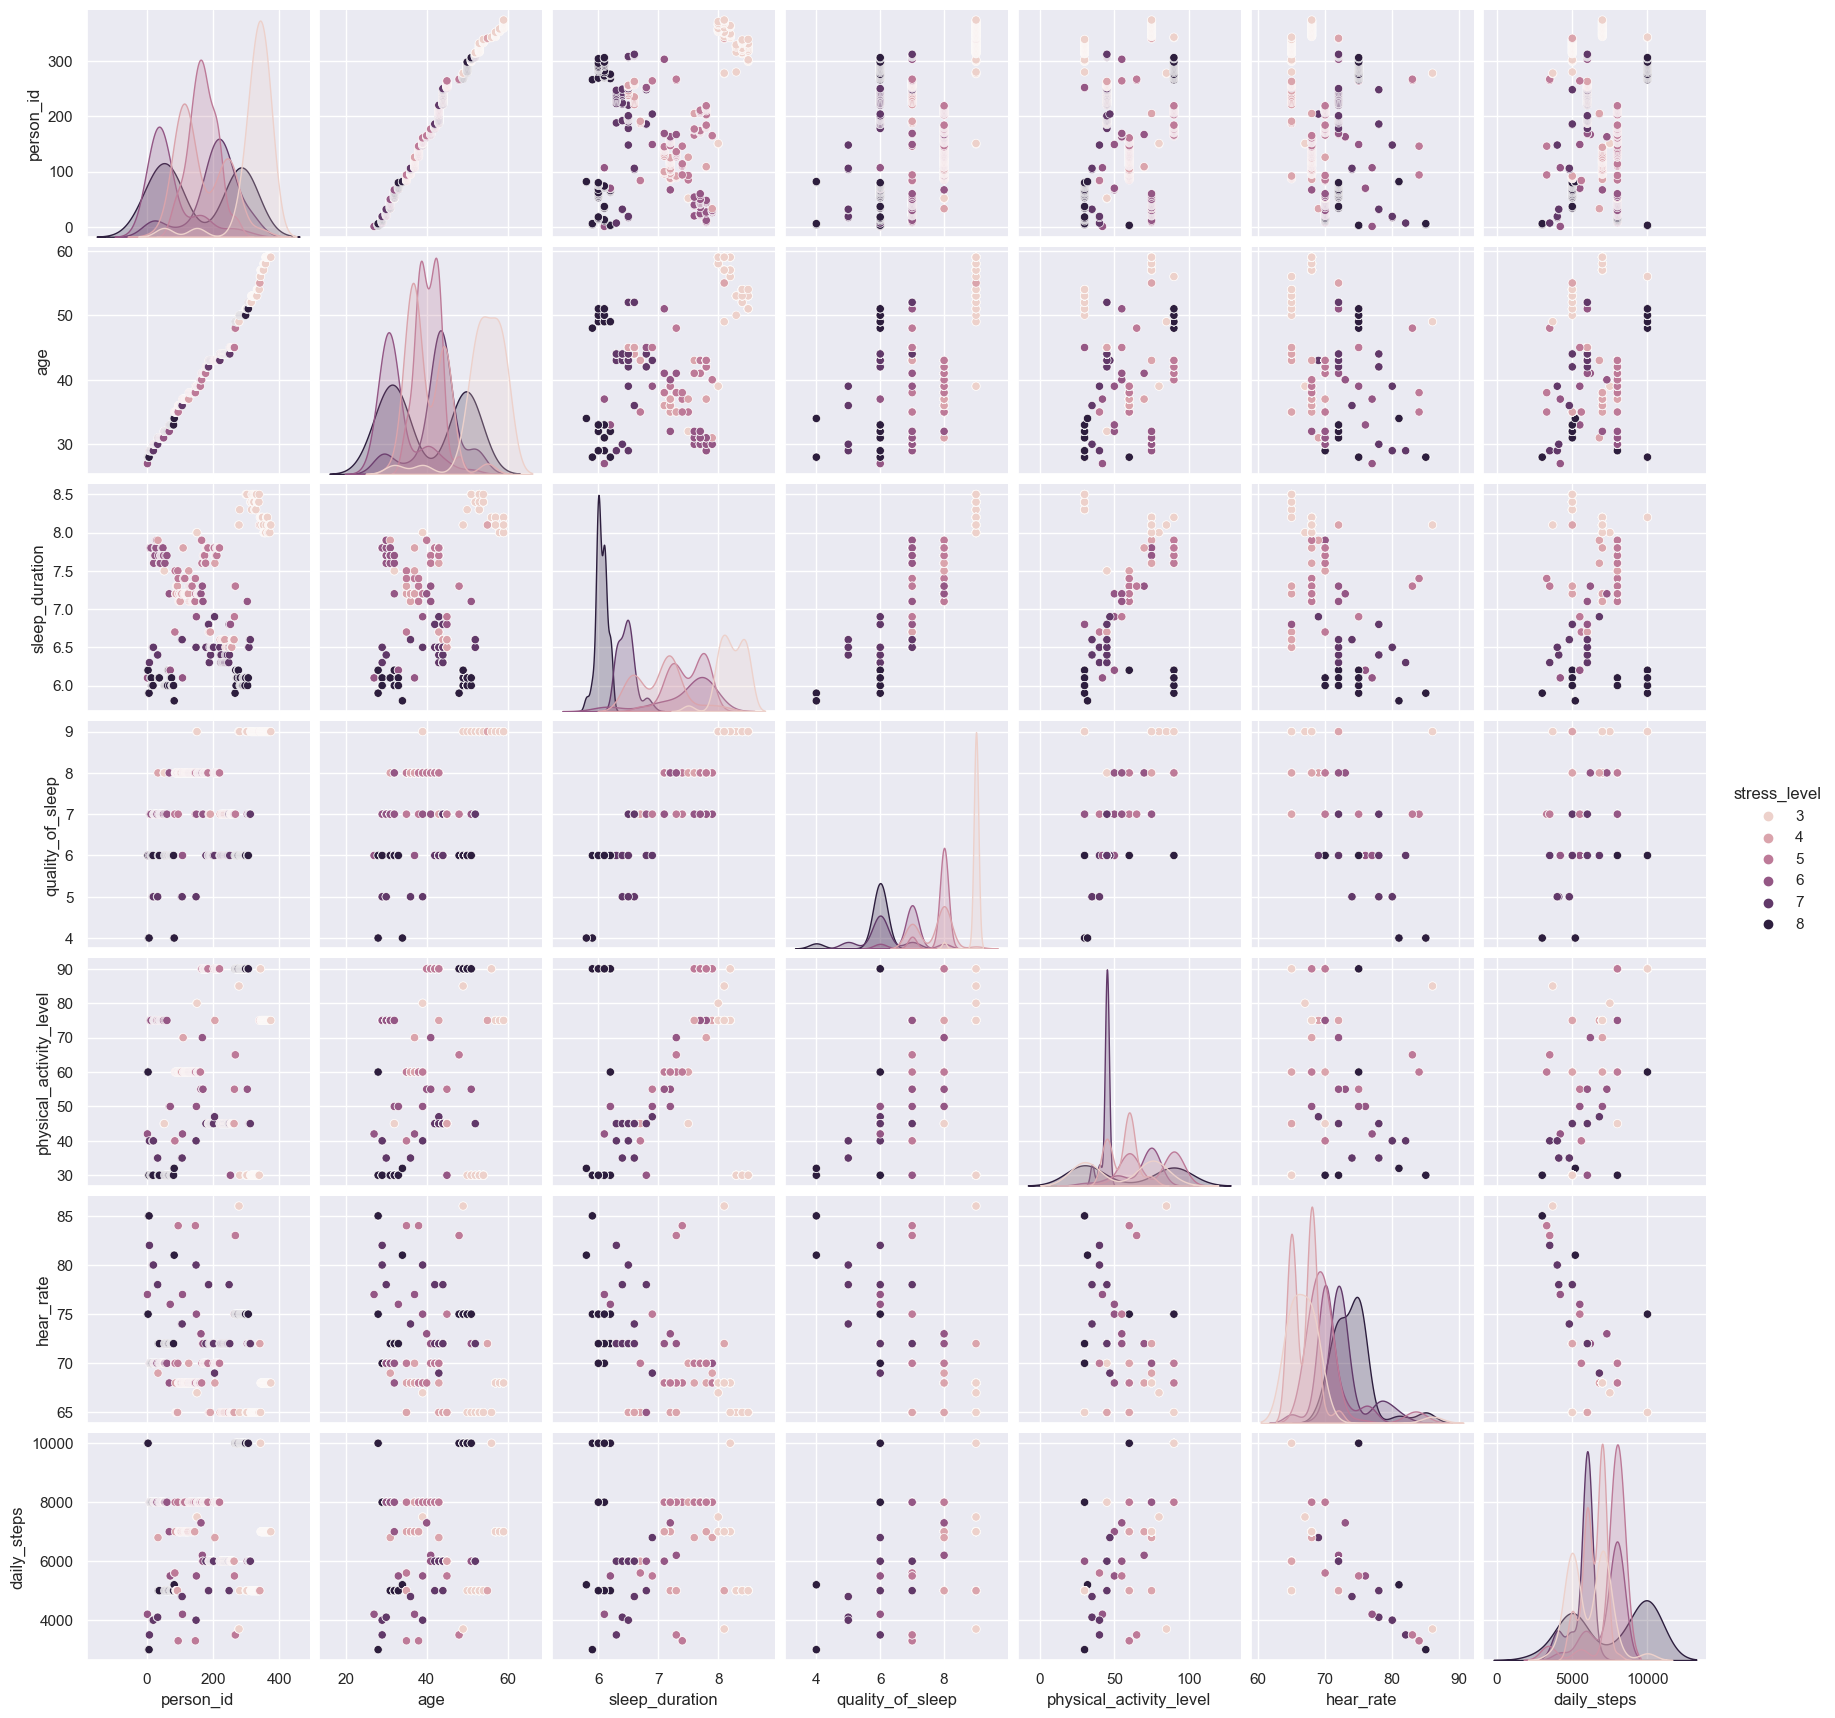

In [7]:
sns.pairplot(df, hue='stress_level')

In [17]:
# convert to numerical values
df = pd.get_dummies(df, columns=['gender', 'occupation', 'bmi_category', 'sleep_disorder'], drop_first=True)

In [18]:
print(df.columns)

Index(['person_id', 'age', 'sleep_duration', 'quality_of_sleep',
       'physical_activity_level', 'stress_level', 'blood_pressure',
       'hear_rate', 'daily_steps', 'gender_Male', 'occupation_Doctor',
       'occupation_Engineer', 'occupation_Lawyer', 'occupation_Manager',
       'occupation_Nurse', 'occupation_Sales Representative',
       'occupation_Salesperson', 'occupation_Scientist',
       'occupation_Software Engineer', 'occupation_Teacher',
       'bmi_category_Normal Weight', 'bmi_category_Obese',
       'bmi_category_Overweight', 'sleep_disorder_Sleep Apnea'],
      dtype='object')


In [29]:
# establish variables

independent_variables = ['age', 'sleep_duration',
       'physical_activity_level', 'stress_level',
       'hear_rate', 'daily_steps', 'gender_Male', 'occupation_Doctor',
       'occupation_Engineer', 'occupation_Lawyer', 'occupation_Manager',
       'occupation_Nurse', 'occupation_Sales Representative',
       'occupation_Salesperson', 'occupation_Scientist',
       'occupation_Software Engineer', 'occupation_Teacher',
       'bmi_category_Normal Weight', 'bmi_category_Obese',
       'bmi_category_Overweight', 'sleep_disorder_Sleep Apnea']

dependent_variable = 'quality_of_sleep'

In [22]:
RandomForestClassifier?

Init signature:
RandomForestClassifier(
    n_estimators=100,
    *,
    criterion='gini',
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features='sqrt',
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    bootstrap=True,
    oob_score=False,
    n_jobs=None,
    random_state=None,
    verbose=0,
    warm_start=False,
    class_weight=None,
    ccp_alpha=0.0,
    max_samples=None,
)
Docstring:     
A random forest classifier.

A random forest is a meta estimator that fits a number of decision tree
classifiers on various sub-samples of the dataset and uses averaging to
improve the predictive accuracy and control over-fitting.
The sub-sample size is controlled with the `max_samples` parameter if
`bootstrap=True` (default), otherwise the whole dataset is used to build
each tree.

Read more in the :ref:`User Guide <forest>`.

Parameters
----------
n_estimators : int, default=100
    The number of trees in the forest.


In [30]:
# define X and y
X = df[independent_variables]

y = df[dependent_variable]

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=45)

In [31]:
# initialize an empty random forest model
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(oob_score=True)

model.fit(X_train, y_train)

RandomForestClassifier(oob_score=True)

In [34]:
# now lets evaluate our model
y_pred = model.predict(X_test)

# eval model 
accuracy = accuracy_score(y_true=y_test, y_pred=y_pred)
print("Accuracy Score: %f" % accuracy)

precision = precision_score(y_true=y_test, y_pred=y_pred, average='weighted')
print("Precision Score: %f" % precision)

recall = recall_score(y_true=y_test, y_pred=y_pred, average='weighted')
print("Recall Score: %f" % recall)

f1 = f1_score(y_true=y_test, y_pred=y_pred, average='weighted')
print('F1 Score: %f' % f1)

# # calculate predicted probabilities
# y_pred_proba = model.predict_proba(X_test)

# # keep only the proba for True
# y_pred_proba = y_pred_proba[:,1]

# # compute auc score
# auc = roc_auc_score(y_true=y_test, y_score=y_pred_proba)
# print('AUC Score: %f' % auc)

# produce classification peport
print(classification_report(y_test, y_pred))

Accuracy Score: 0.986667
Precision Score: 0.987246
Recall Score: 0.986667
F1 Score: 0.986652
              precision    recall  f1-score   support

           4       1.00      1.00      1.00         1
           5       1.00      1.00      1.00         1
           6       1.00      0.95      0.98        21
           7       1.00      1.00      1.00        16
           8       0.96      1.00      0.98        22
           9       1.00      1.00      1.00        14

    accuracy                           0.99        75
   macro avg       0.99      0.99      0.99        75
weighted avg       0.99      0.99      0.99        75



In [35]:
print('oob accuracy', model.oob_score_)
print('oob error rate', 1 - model.oob_score_)

oob accuracy 0.9765886287625418
oob error rate 0.02341137123745818


In [36]:
print(np.sqrt(64))
print(np.log2(64))

8.0
6.0


In [37]:
feature_imp = pd.Series(model.feature_importances_,index=independent_variables).sort_values(ascending=False)
feature_imp

sleep_duration                     0.216094
stress_level                       0.195691
age                                0.136539
hear_rate                          0.108755
physical_activity_level            0.067234
daily_steps                        0.065175
occupation_Doctor                  0.053972
bmi_category_Overweight            0.039503
occupation_Lawyer                  0.022773
gender_Male                        0.016884
occupation_Engineer                0.015436
occupation_Teacher                 0.013863
occupation_Nurse                   0.011509
bmi_category_Normal Weight         0.009632
sleep_disorder_Sleep Apnea         0.009273
occupation_Salesperson             0.007401
bmi_category_Obese                 0.005419
occupation_Scientist               0.001957
occupation_Sales Representative    0.001443
occupation_Software Engineer       0.001182
occupation_Manager                 0.000265
dtype: float64